# **Titanic Survival Tutorial**
The Titanic disaster was one of the most infamous maritime tragedies in history, which is still known even more than 100 years after its demise. The RMS Titanic was a British passenger liner that sank on its maiden voyage from Southampton to New York City in April 1912.

The challenge is to see whether we can predict the people who are not going to survive the disaster based on some features that are provided.

### <u><i>Loading Helpful Packages</i></u>:
<p> <span style="background-color: #E8E8E8"><strong>"numpy"</strong></span> for linear algebra.</p>
<p> <span style="background-color: #E8E8E8"><strong>"pandas"</strong></span> for data processing, Comma Separated Values (CSV) file input and output.</p>
<p><span style="background-color: #E8E8E8"><strong>"matplotlib.pyplot"</strong></span> and <span style="background-color: #E8E8E8"><strong>"seaborn"</strong></span> for statistical graphics and visualization.</p>

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### <u><i>Importing the Datasets</i></u>:

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


#### <u><i>The Train Data</i></u>:
<p>These are the data on which we will train our models.</p>

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv") # Internal Kaggle path.
train_data.head(10) # Display the first ten observations.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


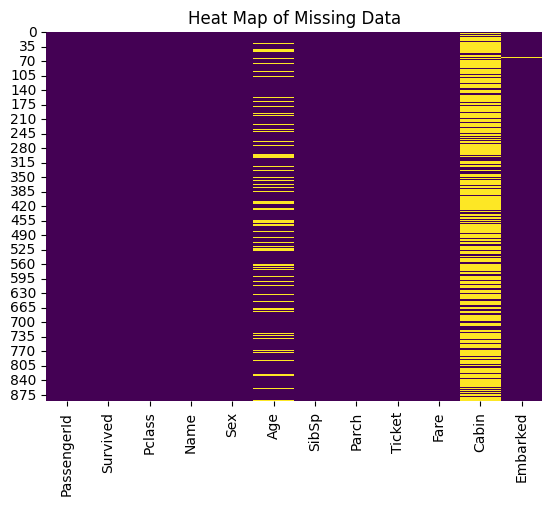

In [4]:
# Checking for missing data:
sns.heatmap(train_data.isnull(), cmap='viridis', cbar=False) # No colour bar.
plt.title('Heat Map of Missing Data')
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>It would appear that the variables: "Age", "Cabin" and "Embarked" have some missing values.</p>

#### <u><i>The Test Data</i></u>:
<p>These are the data on which we will test our models.</p>

In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head(10) # Display the first ten observations.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


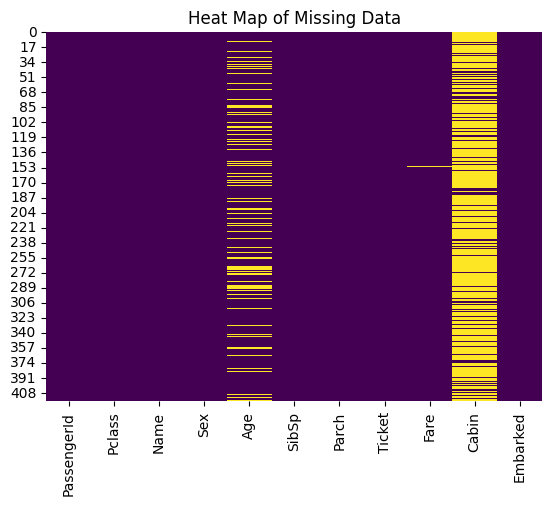

In [6]:
# Checking for missing data:
sns.heatmap(test_data.isnull(), cmap='viridis', cbar=False) # No colour bar.
plt.title('Heat Map of Missing Data')
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>It appears that the variables: "Age", "Fare" and "Cabin" have missing values. None for "Embarked" like it was in the training data.</p>

## <b><u><i>Some Data Visualizations</i></u></b>:

#### <u><i>Survival Rate by Class and Gender</i></u>:

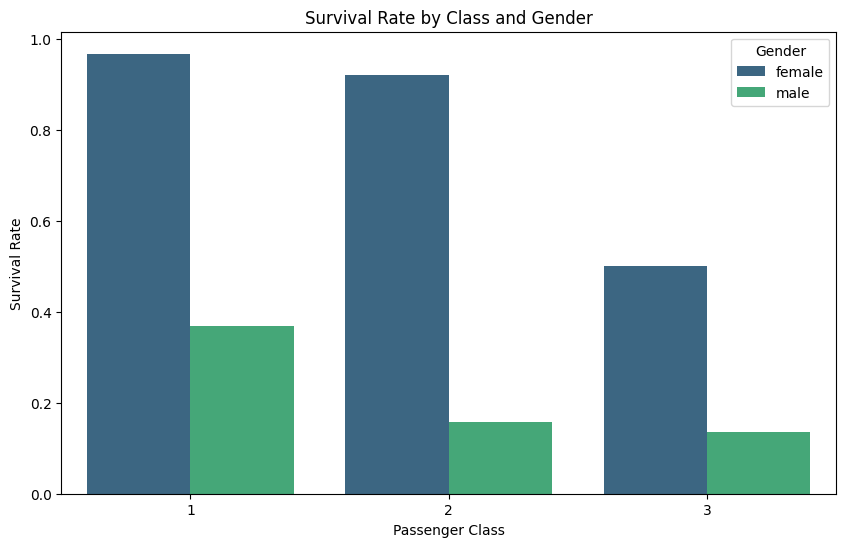

In [7]:
# Create a new data frame with Survival Rate information:
survival_rate_df = train_data.groupby(['Pclass', 'Sex'])['Survived'].mean().reset_index()

# Plotting using seaborn:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=survival_rate_df, palette='viridis')
plt.title('Survival Rate by Class and Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.legend(title='Gender')
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>It would appear that higher classes had higher chances of survival. Overall females seem to have higher chances of surviving the disaster when compared to male survivors. This could be according to the maritime protocol of letting women and children go first on the lifeboats so that they could have a higher chance of suvival.</p>

#### <u><i>The Age Distribution of All Persons on the Titanic</i></u>:

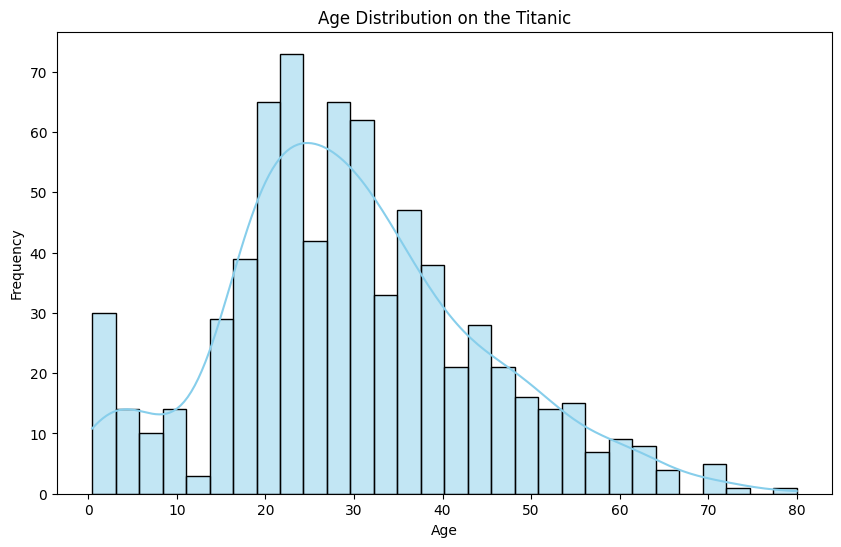

In [8]:
# Drop missing values in the 'Age' column:
age_data = train_data['Age'].dropna()

# Plotting using seaborn:
plt.figure(figsize=(10, 6))
sns.histplot(age_data, bins=30, kde=True, color='skyblue')
plt.title('Age Distribution on the Titanic')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>From the graph right above, we can see that most people were in between their 20s and 30s. There were children present and it seems from the distribution above that most of the children were babies.</p>

#### <u><i>Family Size Versus Survival Graph</i></u>:

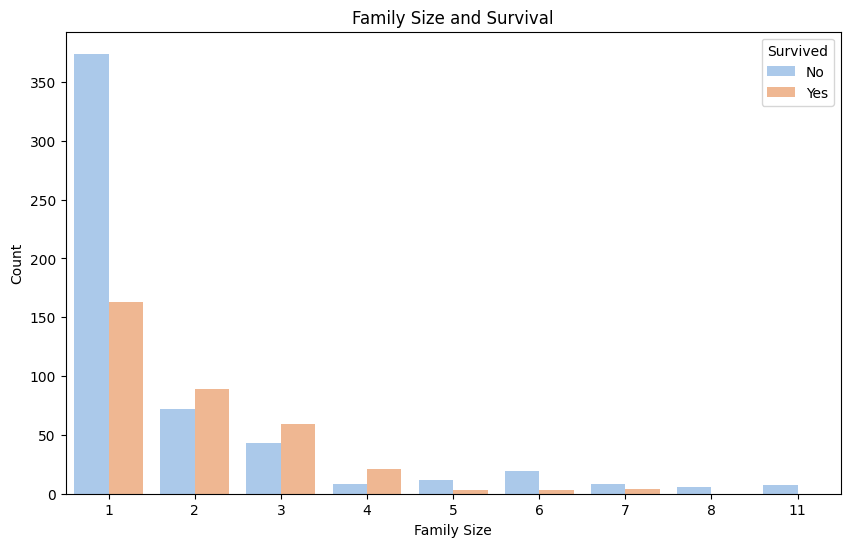

In [9]:
# Copy the "train_data" structure into a new data frame "df", because I do not want to alter the original data.
df = train_data.copy()

# Create a new column 'FamilySize' by summing 'SibSp' and 'Parch':
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 for the passenger himself.

# Plotting using seaborn:
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', hue='Survived', data=df, palette='pastel')
plt.title('Family Size and Survival')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>The larger families must have had a tough time securing a boat for all of their members and most certainly in the panic of the moment a lot of memeber must have been lost. Therefore, it would be reasonable to think that smaller families had greater chances of survival.</p>

#### <u><i>Cabin Versus Survival Graph</i></u>:

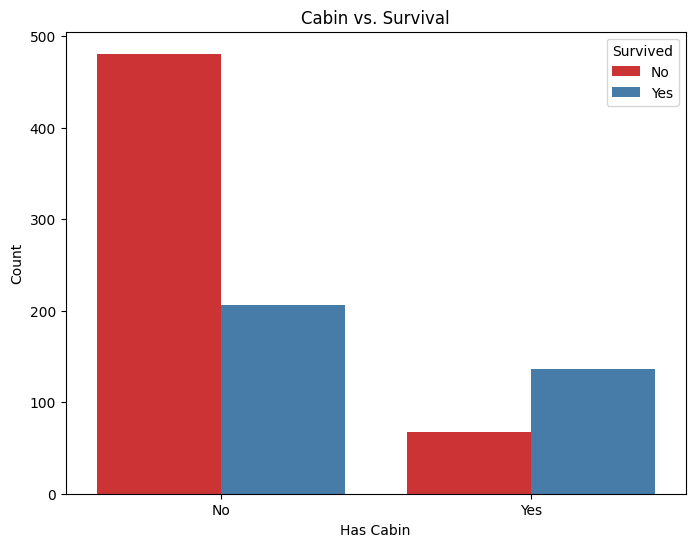

In [10]:
# Same as before, copy the "train_data" structure into a new data frame "df".
df = train_data.copy()

# Fill missing 'Cabin' values with 'Unknown':
df['Cabin'].fillna('Unknown', inplace=True)

# Create a new column 'HasCabin' indicating whether the passenger has a recorded cabin.
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1) # The missing values from before will be considered as the passenger not having a cabin.

# Plotting using seaborn:
plt.figure(figsize=(8, 6))
sns.countplot(x='HasCabin', hue='Survived', data=df, palette='Set1')
plt.title('Cabin vs. Survival')
plt.xlabel('Has Cabin')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<p><u><i>Comments on the graph above</i></u>:</p>
<p>It seems like the people who had a cabin had a higher chance of survival. Although this graph should be taken with a grain of salt, as the missing values have been added to people who had no cabins booked.</p>

## <b><u><i>Predicting Survivors</i></u></b>:

### <u><i>1. Logistic Regression</i></u>:
<p><strong>Logistic Regression</strong> (also called <i>Logit Regression</i>) is a probabilistic statistical classification model that predicts the probability of the occurrence  of an event. If the estimated probability is greater than 50%, then the model predicts that the observation belongs to that particular class (to the class labeled "1"), and otherwise it predicts that it does not (or to the class labeled "0"). This makes it a binary classifier. The (multiple) logistic function, in our example, can be written as:</p>
<p>$P(Y|X)=\frac{exp(\beta_0 + \beta_1X_i + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6)}{1 + exp (\beta_0 + \beta_1X_i + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6)}$</p>

In [11]:
# Import the LogisticRegression class from the scikit-learn library:
from sklearn.linear_model import LogisticRegression

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Initialize a Logistic Regression model with a specified random seed for reproducibility:
LR = LogisticRegression(random_state=5)

# Training the Logistic Regression model (using the training data):
LR.fit(X_train, y_train)

# Making predictions on the test data, (using the trained model):
logr_pred = LR.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <u><i>2. K-Nearest Neighbours</i></u>:
<p>Yet another famous methodology, is the <strong>K-Nearest Neighbors</strong> (<i>K-NN</i>) classification methodology. What it does, is it identifies a group of <i>K</i> objects in the training set that are closest to the test object and assigns a label based on the most dominant class in this neighborhood. So for example if we have chosen a neighbourhood of five objects and three of them were labeled as 1, then the new observation would also be labelled as 1.</p>
<p>The basic idea is that if we want to predict the value of a new observation we look for observations similar to this one and we use as predictors their values (or a function of them). Specifically, for classification problems as ours, we use the mode of the classes of the nearest data.</p>

In [12]:
# Import the KNeighborsClassifier from the scikit-learn library:
from sklearn.neighbors import KNeighborsClassifier

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Initialize a KNeighborsClassifier with specified parameters:
#-----------------------------------------------------------------------------
# - n_neighbors: Number of neighbors to consider (in this case, 5 neighbors).
# - metric: Distance metric used for the purpose of finding neighbors 
#          (here, 'minkowski').
# - p: Power parameter for the Minkowski distance metric (here, p=3 
#      corresponds to the L3 norm)
#-----------------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)

# Fit the model using the training data:
knn.fit(X_train, y_train)

# Make predictions on the test data:
knn_pred = knn.predict(X_test)

### <u><i>3. Random Forest Classification</i></u>:
<p>We have already mentioned this technique in the previous exercise, but let us repeat how this procedure works once again. <strong>Random Forest</strong> is an ensemble learning approach for classification, in which “weak learners” collaborate to form “strong learners,” using a large collection of decorrelated decision trees (the random forest). Instead of developing a solution based on the output of a single deep tree, however, random forest aggregates the output from a number of shallow trees, forming an additional layer to bagging. Bagging constructs n predictors, using independent successive trees, by bootstrapping samples of the dataset. The n predictors are combined to solve a classification or estimation problem through averaging. Although individual classifiers are weak learners, all the classifiers combined form a strong learner.</p>

In [13]:
# Import the RandomForestClassifier from the scikit-learn library:
from sklearn.ensemble import RandomForestClassifier

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Initialize a RandomForestClassifier with specified hyperparameters:
#--------------------------------------------------------------------
# - n_estimators: the number of trees in the forest
# - max_depth: the maximum depth of the trees
# - random_state: seed for reproducibility
#--------------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the RandomForestClassifier on the training data:
rf.fit(X_train, y_train)

# Use the trained model to make predictions on the test data:
rf_pred = rf.predict(X_test)

### <u><i>4. Gradient Boosting Classification</i></u>:
<p><strong>Gradient Boosting</strong> is an ensemble learning technique that builds a series of weak learners (usually decision trees) sequentially, where each new tree corrects the errors made by the previous ones. The <strong>Gradient Boosting Classifier</strong> is specifically used for classification tasks. It is a powerful and widely used machine learning algorithm known for its high performance and flexibility. One of the popular implementations of Gradient Boosting is the XGBoost (Extreme Gradient Boosting) algorithm.</p>

<p>Here are some key concepts and characteristics of the Gradient Boosting Classifier:</p>

<ol>
    <li><u><i>Boosting</i></u>: Gradient Boosting belongs to the family of boosting algorithms, where weak learners are combined to create a strong learner. Weak learners are typically shallow decision trees (also known as weak learners or base learners).</li>
    <li><u><i>Sequential Training</i></u>: Trees are added sequentially to the ensemble, and each new tree focuses on correcting the errors of the combined model so far. The output of the entire ensemble is the sum of the outputs of all the individual trees.</li>
    <li><u><i>Gradient Descent</i></u>: The "Gradient" in Gradient Boosting refers to the use of gradient descent optimization to minimize a loss function. The algorithm minimizes the loss by adjusting the parameters (weights) of the weak learners.</li>
    <li><u><i>Regularization</i></u>: Gradient Boosting includes regularization techniques to prevent overfitting, such as controlling the depth of individual trees or adding a penalty term.</li>
    <li><u><i>XGBoost</i></u>: XGBoost is an optimized and efficient implementation of Gradient Boosting. It includes additional features like regularization, parallel processing, and handling missing values, making it widely used in competitions and real-world applications.</li>
    <li><u><i>Hyperparameter Tuning</i></u>: Gradient Boosting models have several hyperparameters that can be tuned to optimize performance. Common hyperparameters include learning rate, tree depth, number of trees, and regularization parameters.</li>
    <li><u><i>Feature Importance</i></u>: Gradient Boosting models can provide insights into feature importance, helping you understand which features contribute the most to the model's predictions.</li>
</ol>

In [14]:
# Import the XGBClassifier from the XGBoost library:
from xgboost import XGBClassifier

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Initialize an XGBoost classifier with a random seed for reproducibility:
xgb = XGBClassifier(random_state=42)

# Train (fit) the XGBoost classifier on the training data:
xgb.fit(X_train, y_train)

# Use the trained model to make predictions on the test set:
xgb_pred = xgb.predict(X_test)

### <u><i>5. Naive Bayes Classification</i></u>:
<p>Naive Bayes is a simple probabilistic classifier that applies Bayes’ theorem with strong (naive) assumption of independence, such that the presence of an individual feature of a class is unrelated to the presence of another feature.</p>
<p>Assume that input features $x_1$, $x_2$, ..., $x_n$, are conditionally independent of each other, given the class label $Y$, such that:</p>
<p>$P(x_1,x_2,...,x_n|Y)=\prod_{i=1}^{n}P(x_i|Y)$</p>
<p>Therefore, if we only had two classes, like in our problem, then we would define $P(i|x)$, for $i=0,1$ as the probability that measurement vector $x=\{x_1, x_2, ..., x_n\}$ belongs to class $i$. While the classification score would be defined as:</p>
<p>$\frac{P(1|x)}{P(0|x)}=\frac{\prod_{i=1}^{n}f(x_i|1)P(1)}{\prod_{i=1}^{n}f(x_i|0)P(0)}=\frac{P(1)}{P(0)}\prod_{i=1}^{n}\frac{f(x_i|1)}{f(x_i|0)}$</p>
<p>The naive Bayes model is surprisingly effective and immensely appealing, owing to its simplicity and robustness. Because this algorithm does not require application of complex iterative parameter estimation schemes to large datasets, it is very useful and relatively easy to construct and use. It's somewhat similar to <strong>K-Nearest Neighbors</strong> in the sense that it makes some assumptions that might oversimplify reality, but still, it performs well in many cases.</p>

In [15]:
# Import the Gaussian Naive Bayes classifier from scikit-learn:
from sklearn.naive_bayes import GaussianNB

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Initialize a Gaussian Naive Bayes classifier:
NB = GaussianNB()

# Train the Naive Bayes classifier using the training data:
NB.fit(X_train, y_train)

# Use the trained model to make predictions on the test data:
nb_pred = NB.predict(X_test)

### <u><i>6. Support Vector Machine</i></u>:
<p><strong>Support Vector Machine</strong> is a powerful, highly flexible modeling technique. It classifies the data by finding the hyperplane (meaning an <i>n – 1</i> subspace in an <i>n</i>-dimensional space) that maximizes the margin between the classes in the training data. In two dimensions, for example, the hyperplane is a line that separates the data. Thus, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class.</p>

In [16]:
# Import the Support Vector Classification (SVC) class from the scikit-learn library:
from sklearn.svm import SVC

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Create a Support Vector Machine (SVM) classifier with a radial basis function (RBF) kernel:
svm = SVC(kernel='rbf', random_state=0)

# Train the SVM model on the training data:
svm.fit(X_train, y_train)

# Use the trained SVM model to make predictions on the test data:
svm_pred = svm.predict(X_test)

### <u><i>7. Artificial Neural Networks (ANN)</i></u>:
<p><strong>Artificial Neural Network</strong> (<i>ANN</i>) is an efficient computing system whose central theme is borrowed from the analogy of biological neural networks. It incorporates a set of interconnected nodes that operate in parallel at each layer of the program. Its complexity depends on the architecture that we shall provide it each time. At this time and for this rather simple problem, we shall require a simple <i>Sequential</i> model, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).</p> 
<p>At this point we shall choose to use 4 layers in total (one input, one hidden) with 64 nodes in the first two and 32 in the last two, as well as an output layer of one value as the <i>Sequential</i> model requires. Since this is a simple classification, the output layer will be a <i>sigmoid</i> function.</p>
<p>We shall also standardize the features, and here's why:</p>
<ol>
    <li><u><i>Gradient Descent Convergence</i></u>: Standardizing features helps gradient descent converge faster. When features have different scales, the optimizer may take longer to find the optimal weights and biases during training.</li>
    <li><u><i>Weight Initialization</i></u>: Standardizing features can aid in weight initialization. When features are on different scales, the initial weights assigned to the network may lead to slow convergence or vanishing/exploding gradients.</li>
    <li><u><i>Numerical Stability</i></u>: Standardization improves numerical stability in the computations performed during training. Large input values can result in very large or very small intermediate values, leading to numerical instability.</li>
    <li><u><i>Model Interpretability</i></u>: Standardized features make it easier to interpret the impact of each feature on the model. The importance of features is more consistent when they are on the same scale.</li>
    <li><u><i>Regularization</i></u>: Regularization techniques, such as L1 or L2 regularization, assume that all features have a similar scale. Standardizing features ensures that regularization penalties are applied uniformly across all features.</li>
    <li><u><i>ANN Activation Functions</i></u>: Some activation functions, like the sigmoid or tanh, are sensitive to the scale of the input. Standardizing features can prevent saturation of these functions, allowing the network to capture more nuanced patterns.</li>
    <li><u><i>Compatibility with Batch Normalization</i></u>: If you use batch normalization layers in your neural network, standardizing features can make the training process more stable and effective.</li>
</ol>

In [17]:
# Import necessary libraries:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Standardize features using StandardScaler:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model using Keras Sequential API:
ann = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')  # Output layer with 1 neuron (binary classification) and sigmoid activation
])

# Compile the model using binary crossentropy loss and Adam optimizer:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the scaled training data with 200 epochs and a batch size of 32:
ann.fit(X_train_scaled, y_train, epochs=200, batch_size=32)

# Evaluate the trained model on the scaled test set:
y_pred_probs = ann.predict(X_test_scaled)

# Convert probabilities to binary predictions using a threshold (e.g., 0.5):
threshold = 0.5
ann_pred = np.ravel((y_pred_probs > threshold).astype(int))

Epoch 1/200
28/28 [==============================] - 2s 3ms/step - loss: 0.6039 - accuracy: 0.7486
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8025
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4459 - accuracy: 0.8013
Epoch 4/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8058
Epoch 5/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4300 - accuracy: 0.8092
Epoch 6/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4247 - accuracy: 0.8148
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4205 - accuracy: 0.8204
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4206 - accuracy: 0.8137
Epoch 9/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8148
Epoch 10/200
28/28 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8182
Epoch 11/

### <u><i>8. Random Forest Classification with Cross-Validation</i></u>:
<p><strong>Random Forest Classification with Cross-Validation</strong> is a powerful and widely used machine learning technique for predictive modeling. Random Forest is an ensemble learning method that combines the predictions of multiple decision trees to improve accuracy and robustness. Each tree is trained on a random subset of the training data and makes independent predictions. The final prediction is then determined by aggregating the results of individual trees, often through a majority voting mechanism.</p>
<p>Cross-validation is a crucial component when working with Random Forests to assess their performance and generalization capabilities. Cross-validation involves splitting the dataset into multiple subsets, typically k-folds, where the model is trained on k-1 folds and validated on the remaining fold. This process is repeated k times, and performance metrics are averaged to provide a more reliable estimate of the model's effectiveness.</p>
<p>The combination of Random Forest and Cross-Validation addresses several key issues in machine learning, such as overfitting and variability in model performance. Random Forest helps reduce overfitting by introducing randomness in the training process, and cross-validation provides a more robust evaluation of the model's performance by testing it on different subsets of the data.</p>
<p>Benefits of <strong>Random Forest Classification with Cross-Validation</strong> include:</p>
<ol>
    <li><u><i>Improved Generalization</i></u>: Random Forests are less prone to overfitting, making them well-suited for a wide range of datasets.</li>
    <li><u><i>High Accuracy</i></u>: The ensemble nature of Random Forests often results in higher predictive accuracy compared to individual decision trees.</li>
    <li><u><i>Feature Importance</i></u>: Random Forests provide a measure of feature importance, helping to identify the most influential features in the dataset.</li>
    <li><u><i>Robustness</i></u>: The combination of randomness and cross-validation enhances the model's robustness, making it more reliable across different subsets of the data.</li>
    <li><u><i>Versatility</i></u>: Random Forests can be applied to both classification and regression problems, making them versatile for various tasks.</li>
</ol>
<p>In summary, Random Forest Classification with Cross-Validation is a potent approach in machine learning, offering improved accuracy, robustness, and generalization. It is particularly useful when dealing with complex datasets and scenarios where overfitting is a concern.</p>

In [18]:
# Import necessary libraries from scikit-learn:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Initialize a RandomForestClassifier with specified parameters:
rfc = RandomForestClassifier(random_state=42, 
                             n_jobs=-1 # Use all processors.
                            )

# Define the parameter grid for hyperparameter tuning using GridSearchCV:
param_grid = { 
    'n_estimators': [50, 80, 100, 200],  # The number of trees in the forest.
    'max_features': ['sqrt'],  # The number of features to consider when looking for the best split.
    'max_depth' : [2, 3, 4, 5],  # The maximum depth of the individual regression estimators.
    'criterion' :['gini', 'entropy']  # Function to measure the quality of a split.
}

# Initialize GridSearchCV with the RandomForestClassifier and parameter grid:
# (use 5-fold cross-validation and accuracy as the scoring metric).
cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data:
cv_rfc.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV:
print('Best Model Hyperparameters:', cv_rfc.best_params_)

# Make predictions on the test data using the best model:
cv_rfc_pred = cv_rfc.predict(X_test)

Best Model Hyperparameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 80}


### <u><i>9. Support Vector Machine with Cross-Validation</i></u>:
<p>Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks. One crucial aspect in training an SVM model is determining the appropriate hyperparameters, such as the regularization parameter (C) and the kernel type. Cross-validation is a key technique employed to find the optimal set of hyperparameters for SVM models.</p>
<p>Cross-validation involves partitioning the dataset into multiple subsets, training the model on a subset, and validating it on the remaining data. This process is repeated several times, with different subsets used for training and validation in each iteration. One common method for cross-validation is k-fold cross-validation, where the dataset is divided into k equally sized folds, and the model is trained and evaluated k times, each time using a different fold as the validation set.</p>
<p>For SVM, cross-validation helps in tuning hyperparameters to achieve better generalization performance. It prevents overfitting by assessing the model's performance on various subsets of the data, ensuring that the model's performance is not overly dependent on a specific training-test split.</p>
<p>During cross-validation, the SVM algorithm explores different combinations of hyperparameters, and the performance metrics (such as accuracy, precision, or F1-score) are averaged over the k iterations. This provides a more robust estimate of the model's performance and helps to identify the hyperparameter values that result in the best overall performance on the given dataset.</p>
<p>In summary, <strong>Support Vector Machines with Cross-Validation</strong> is a systematic approach to fine-tune SVM models, enhancing their ability to generalize well to unseen data and improving their reliability in real-world applications. It is an essential step in the model development process to ensure that the SVM model performs optimally across different data subsets.</p>

In [19]:
# Import necessary libraries:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Extract the target variable (y_train) from the training data:
y_train = train_data["Survived"]

# Choose the features to use in the model:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Fare"]

# Create the feature matrices for training and testing data using one-hot encoding:
X_train = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

# Impute the missing values by using the "Fare" column's median:
median_fare = X_test['Fare'].median()
X_test['Fare'].fillna(median_fare, inplace=True)

# Create a Support Vector Machine (SVM) classifier:
cv_svm = SVC()

# Define the hyperparameter grid for GridSearchCV:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}

# Create a GridSearchCV object with SVM classifier, hyperparameter grid:
# (use 10-fold cross-validation, and accuracy scoring):
grid_search = GridSearchCV(cv_svm, param_grid, cv=5, scoring='accuracy', verbose = 10)

# Fit the GridSearchCV object on the training data to find the best hyperparameters:
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV:
print("Best Model Hyperparameters:", grid_search.best_estimator_)

# Retrieve the best model from the grid search:
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best model:
cv_svm_pred = best_model.predict(X_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START C=0.1, gamma=0.1, kernel=linear............................
[CV 1/5; 1/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.804 total time=   0.2s
[CV 2/5; 1/24] START C=0.1, gamma=0.1, kernel=linear............................
[CV 2/5; 1/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.803 total time=   0.1s
[CV 3/5; 1/24] START C=0.1, gamma=0.1, kernel=linear............................
[CV 3/5; 1/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.787 total time=   0.2s
[CV 4/5; 1/24] START C=0.1, gamma=0.1, kernel=linear............................
[CV 4/5; 1/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.753 total time=   0.1s
[CV 5/5; 1/24] START C=0.1, gamma=0.1, kernel=linear............................
[CV 5/5; 1/24] END C=0.1, gamma=0.1, kernel=linear;, score=0.787 total time=   0.1s
[CV 1/5; 2/24] START C=0.1, gamma=0.1, kernel=rbf...............................
[CV 1/5; 2/24] END C=0.1, gamma=

#### <u><i>Exporting our results into a <i>CSV</i> file and submitting them</i></u>:

In [20]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': cv_svm_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## <b><u><i>Conclusion</i></u></b>:
In Conclusion, the simple <strong><i>Random Forest Classifier</i></strong> gave the best accuracy possible, which is: <strong><i>0.78708</i></strong>. The accuracy rose due to the use of the "Fare" feature, which was imputed by its median values because of some missing data in the column.

## **Citation**
<p> Will Cukierski. (2012). Titanic - Machine Learning from Disaster. Kaggle. https://kaggle.com/competitions/titanic </p>